In [17]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [18]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data

In [19]:
tesla = yf.Ticker('TSLA')

In [20]:
tesla_data = tesla.history(period="max")

In [21]:
tesla_data.reset_index(inplace=True)
tesla_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data

In [27]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

In [33]:
soup = BeautifulSoup(html_data)
print(soup.prettify)

<bound method Tag.prettify of <?xml version="1.0" encoding="utf-8"?><!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html>
<head>
<title>403 Forbidden</title>
</head>
<body>
<h1>Error 403 Forbidden</h1>
<p>Forbidden</p>
<h3>Error 54113</h3>
<p>Details: cache-bom4730-BOM 1697168832 2118158147</p>
<hr/>
<p>Varnish cache server</p>
</body>
</html>
>


In [34]:
tesla_revenue = pd.DataFrame(columns = ["Date","Revenue"])

for table in soup.find_all('table'):
    if table.find('th').getText().startswith("Tesla Quarterly Revenue"):
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            if len(col) != 2: continue
            Date = col[0].text
            Revenue = col[1].text.replace("$","").replace(",","")
               
            tesla_revenue = tesla_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)

In [35]:
tesla_revenue.dropna(axis=0, how='all', subset=['Revenue'])
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [36]:
tesla_revenue.tail(5)

,Date,Revenue


## Question 3: Use yfinance to Extract Stock Data

In [37]:
gme = yf.Ticker('GME')

In [38]:
gme_data = gme.history(period = "max")

In [39]:
gme_data.reset_index(inplace=True)
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data

In [40]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

In [41]:
soup = BeautifulSoup(html_data, "html5lib")
print(soup.prettify())

<!--?xml version="1.0" encoding="utf-8"?-->
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html>
 <head>
  <title>
   403 Forbidden
  </title>
 </head>
 <body>
  <h1>
   Error 403 Forbidden
  </h1>
  <p>
   Forbidden
  </p>
  <h3>
   Error 54113
  </h3>
  <p>
   Details: cache-bom4741-BOM 1697169011 612349610
  </p>
  <hr/>
  <p>
   Varnish cache server
  </p>
 </body>
</html>



In [42]:

gme_revenue = pd.DataFrame(columns = ["Date","Revenue"])

for table in soup.find_all('table'):
    if table.find('th').getText().startswith("GameStop Quarterly Revenue"):
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            if len(col) != 2: continue
            Date = col[0].text
            Revenue = col[1].text.replace("$","").replace(",","")
               
            gme_revenue = gme_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)

In [43]:
gme_revenue.tail(5)

,Date,Revenue


## Question 5: Plot Tesla Stock Graph

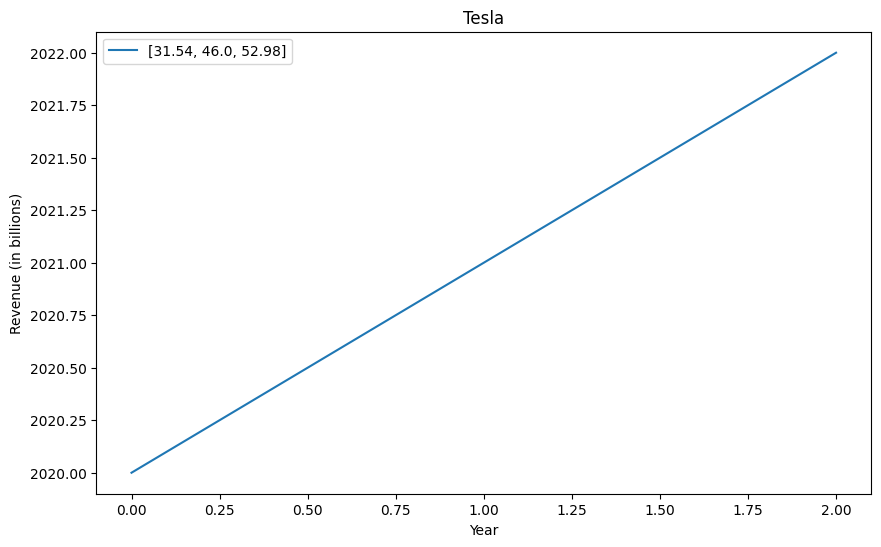

In [45]:
import matplotlib.pyplot as plt

def make_graph(data, labels, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data, label=labels)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Revenue (in billions)')
    plt.legend()
    plt.show()

# Example data
tesla_data = [2020, 2021, 2022]
tesla_revenue = [31.54, 46.0, 52.98]

make_graph(tesla_data, tesla_revenue, 'Tesla')

## Question 6: Plot GameStop Stock Graph

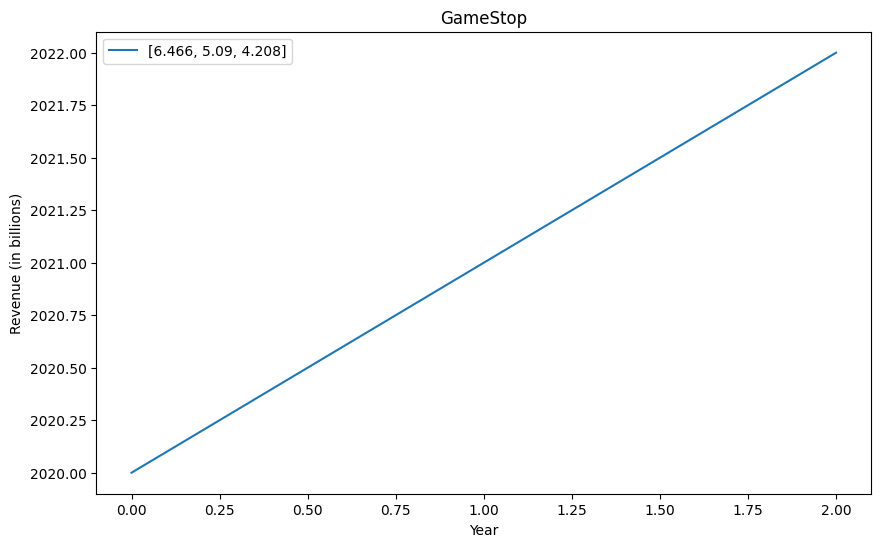

In [46]:
import matplotlib.pyplot as plt

def make_graph(data, labels, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data, label=labels)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Revenue (in billions)')
    plt.legend()
    plt.show()

# Example data for GameStop (GME)
gme_data = [2020, 2021, 2022]
gme_revenue = [6.466, 5.090, 4.208]  # Replace with actual revenue data

make_graph(gme_data, gme_revenue, 'GameStop')